<a href="https://colab.research.google.com/github/Ivanbh214/EDA/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
#Open the file in the github and copy the repository
url = 'https://raw.githubusercontent.com/Ivanbh214/EDA/main/avocado.csv'
df = pd.read_csv(url, sep=",", error_bad_lines=False)

In [3]:
print(df.head(5))

   Unnamed: 0        Date  AveragePrice  ...          type  year  region
0           0  2015-12-27          1.33  ...  conventional  2015  Albany
1           1  2015-12-20          1.35  ...  conventional  2015  Albany
2           2  2015-12-13          0.93  ...  conventional  2015  Albany
3           3  2015-12-06          1.08  ...  conventional  2015  Albany
4           4  2015-11-29          1.28  ...  conventional  2015  Albany

[5 rows x 14 columns]


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [ ]:
df.shape

(18249, 14)

We can see that 3 columns no have name, have numbers. So, this is have to be fix

##Exploratory Data Analysis from avocado dataset
1- Transform any character in interget ato NA 

*   Select the same type of variables

*   Transform this character to NA


2- Count the number of NA 

Kaggle notebook about the avocado price EDA 

1-https://www.kaggle.com/tekdogan/eda-for-avocado-prices

2-https://www.kaggle.com/fabiorope/avocado-prices-eda

3- https://www.kaggle.com/huseyinduman/avocado-prices-data-analysis-eda

In [ ]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

**Variable categóricas**

https://towardsdatascience.com/5-methods-to-check-for-nan-values-in-in-python-3f21ddd17eed

1.   Elimination of space other characters



In [5]:
#From kaggle 3. Could be advisable to replace any character by NaN
df.columns = df.columns.str.replace(' ', '_')
df = df.drop('Unnamed:_0',1)

In [ ]:
#Replace and symbol
df.str.replace(['','-'], 'NA')

df.head(5)

AttributeError: ignored

In [ ]:
# List of characters to remove
chars_to_remove = ['+', ',','$']

In [ ]:
# List of column names to clean
cols_to_clean = ['Installs', 'Price']   

In [ ]:
# Loop for each column in cols_to_clean
for col in cols_to_clean:
    # Loop for each char in chars_to_remove
    for char in chars_to_remove:
        # Replace the character with an empty string
        apps[col] = apps[col].apply(lambda x: x.replace(char, ''))

In [ ]:
#Detection of NA
#import pandas as pd
x = float("nan")
print(f"It's pd.isna  : {pd.isna(x)}")

In [ ]:
df.head()

,Date,AveragePrice,Total_Volume,4046,4225,4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [ ]:
df["4046"]

0        1036.74
1         674.28
2         794.70
3        1132.00
4         941.48
          ...   
18244    2046.96
18245    1191.70
18246    1191.92
18247    1527.63
18248    2894.77
Name: 4046, Length: 18249, dtype: float64

In [ ]:
df[["Date", "AveragePrice", "Total_Volume", "Total_Bags", "Small_Bags", "Large_Bags", "XLarge_Bags"]]

,Date,AveragePrice,Total_Volume,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags
0,2015-12-27,1.33,64236.62,8696.87,8603.62,93.25,0.0
1,2015-12-20,1.35,54876.98,9505.56,9408.07,97.49,0.0
2,2015-12-13,0.93,118220.22,8145.35,8042.21,103.14,0.0
3,2015-12-06,1.08,78992.15,5811.16,5677.40,133.76,0.0
4,2015-11-29,1.28,51039.60,6183.95,5986.26,197.69,0.0
...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,13498.67,13066.82,431.85,0.0
18245,2018-01-28,1.71,13888.04,9264.84,8940.04,324.80,0.0
18246,2018-01-21,1.87,13766.76,9394.11,9351.80,42.31,0.0
18247,2018-01-14,1.93,16205.22,10969.54,10919.54,50.00,0.0


**Exploring categories variables**


In [ ]:
import matplotlib.pyplot as plt
        

In [ ]:
# Print the total number of unique categories type 
num_categories_type = len(df['type'].unique())
num_categories_region = len(df['region'].unique())

print('Number of categories from type variable = ', num_categories_type)
print('Number of categories from region variable = ', num_categories_region)


Number of categories from type variable =  2
Number of categories from region variable =  54


In [ ]:
# Count the number of apps in each 'Category'. 
num_type_avocado = df['type'].value_counts()
num_type_avocado

conventional    9126
organic         9123
Name: type, dtype: int64

In [ ]:
# Sort num_apps_in_category in descending order based on the count of apps in each category
sorted_num_type_avocado = num_type_avocado.sort_values(ascending = False)

sorted_num_type_avocado


conventional    9126
organic         9123
Name: type, dtype: int64

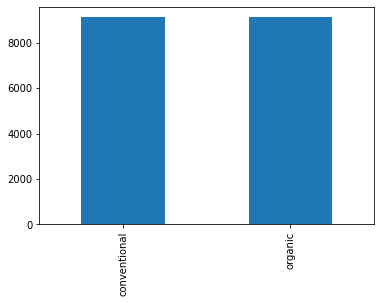

9123    1
9126    1
Name: type, dtype: int64

In [ ]:
sorted_num_type_avocado.plot(kind="bar",x = num_apps_in_category.index,y = num_apps_in_category.values)
plt.show()
sorted_num_type_avocado.value_counts()

TypeError: ignored